# Importing Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


# Validation Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,

    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

# Building Model

In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Input,Dropout
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential()

In [7]:
model.add(Input(shape=(128, 128, 3)))

# Building Convolution Layers

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
# Output Layer
model.add(Dense(units=38,activation='softmax'))

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [20]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1946s 883ms/step - accuracy: 0.3786 - loss: 2.2164 - val_accuracy: 0.8355 - val_loss: 0.5165
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1913s 871ms/step - accuracy: 0.8431 - loss: 0.5036 - val_accuracy: 0.8939 - val_loss: 0.3291
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2054s 935ms/step - accuracy: 0.9106 - loss: 0.2833 - val_accuracy: 0.9404 - val_loss: 0.1932
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1830s 833ms/step - accuracy: 0.9362 - loss: 0.1970 - val_accuracy: 0.9523 - val_loss: 0.1587
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1830s 833ms/step - accuracy: 0.9584 - loss: 0.1285 - val_accuracy: 0.9622 - val_loss: 0.1250
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1830s 833ms/step - accuracy: 0.9646 - loss: 0.1089 - val_accuracy: 0.9677 - val_loss: 0.1042
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1832s 834ms/step - accuracy: 0.9710 - loss: 0.0867 - val_accuracy: 0.9603 - val_loss: 0.1333
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1835s 835ms/s

# Model Evaluation

In [31]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 490s 223ms/step - accuracy: 0.9927 - loss: 0.0247


In [33]:
print(train_loss,train_acc)

0.023276878520846367 0.9927306175231934


In [32]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 117s 212ms/step - accuracy: 0.9686 - loss: 0.1033


In [34]:
print(val_loss,val_acc)

0.09982682764530182 0.969041645526886


# Saving Model

In [25]:
model.save("trained_model.h5")

In [35]:
model.save("trained_model1.keras")

In [39]:
training_history.history

{'accuracy': [0.5899566411972046,
  0.8637456297874451,
  0.9197524785995483,
  0.940963089466095,
  0.95888751745224,
  0.9653460383415222,
  0.9720179438591003,
  0.9768973588943481,
  0.9790027737617493,
  0.982545018196106],
 'loss': [1.3941776752471924,
  0.431639164686203,
  0.250824898481369,
  0.17993614077568054,
  0.12587083876132965,
  0.10403584688901901,
  0.0849853903055191,
  0.07036089152097702,
  0.06265601515769958,
  0.053817346692085266],
 'val_accuracy': [0.8355337977409363,
  0.8938652276992798,
  0.9404165744781494,
  0.9523105025291443,
  0.9622126221656799,
  0.9676758646965027,
  0.9603345990180969,
  0.9695538282394409,
  0.965513288974762,
  0.969041645526886],
 'val_loss': [0.5165271759033203,
  0.3291099965572357,
  0.19323992729187012,
  0.15870216488838196,
  0.12495872378349304,
  0.10422338545322418,
  0.1333266645669937,
  0.10244959592819214,
  0.11870608478784561,
  0.09982680529356003]}

In [36]:
import json
with open("training_hist1.json","w") as f:
    json.dump(training_history.history,f)
    

# Accuracy Visualization

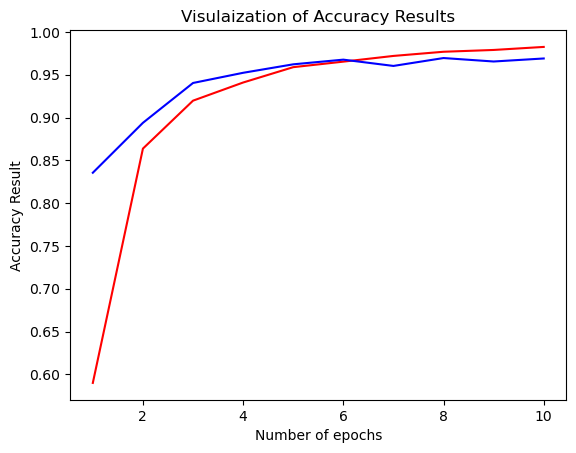

In [42]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validating Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visulaization of Accuracy Results")
plt.show()

In [43]:
class_names = validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [54]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [55]:
y_pred = model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 98s 178ms/step


array([[9.99887824e-01, 1.10671150e-04, 3.11449320e-08, ...,
        4.12025882e-13, 1.52480702e-11, 5.46690360e-10],
       [9.88545597e-01, 1.14242686e-02, 5.42405985e-07, ...,
        2.75484462e-11, 2.39915560e-10, 6.16909723e-09],
       [9.99999881e-01, 2.77260277e-08, 9.61994373e-10, ...,
        2.07318852e-15, 1.15650653e-13, 3.10169425e-11],
       ...,
       [7.52117327e-11, 4.46676279e-13, 3.95850286e-09, ...,
        1.35102901e-10, 9.63390062e-11, 9.99996901e-01],
       [9.51330403e-11, 2.77437849e-13, 2.13184870e-09, ...,
        1.09663834e-10, 2.03066765e-11, 9.99999881e-01],
       [1.12489143e-10, 7.33602740e-13, 4.87389740e-10, ...,
        6.94142714e-13, 2.24108457e-11, 9.99998569e-01]], dtype=float32)

In [56]:
predicted_categories = tf.argmax(y_pred,axis = 1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [57]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [58]:
Y_true = tf.argmax(true_categories,axis = 1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [60]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_true,predicted_categories,target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.95      0.99      0.97       440
                                   Apple___healthy       0.99      0.94      0.97       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.92      0.94       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

In [62]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[471,  11,   0, ...,   0,   0,   0],
       [  0, 493,   0, ...,   0,   0,   0],
       [  0,   0, 436, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 490,   0,   0],
       [  0,   0,   0, ...,   0, 442,   0],
       [  0,   0,   0, ...,   0,   0, 473]], dtype=int64)

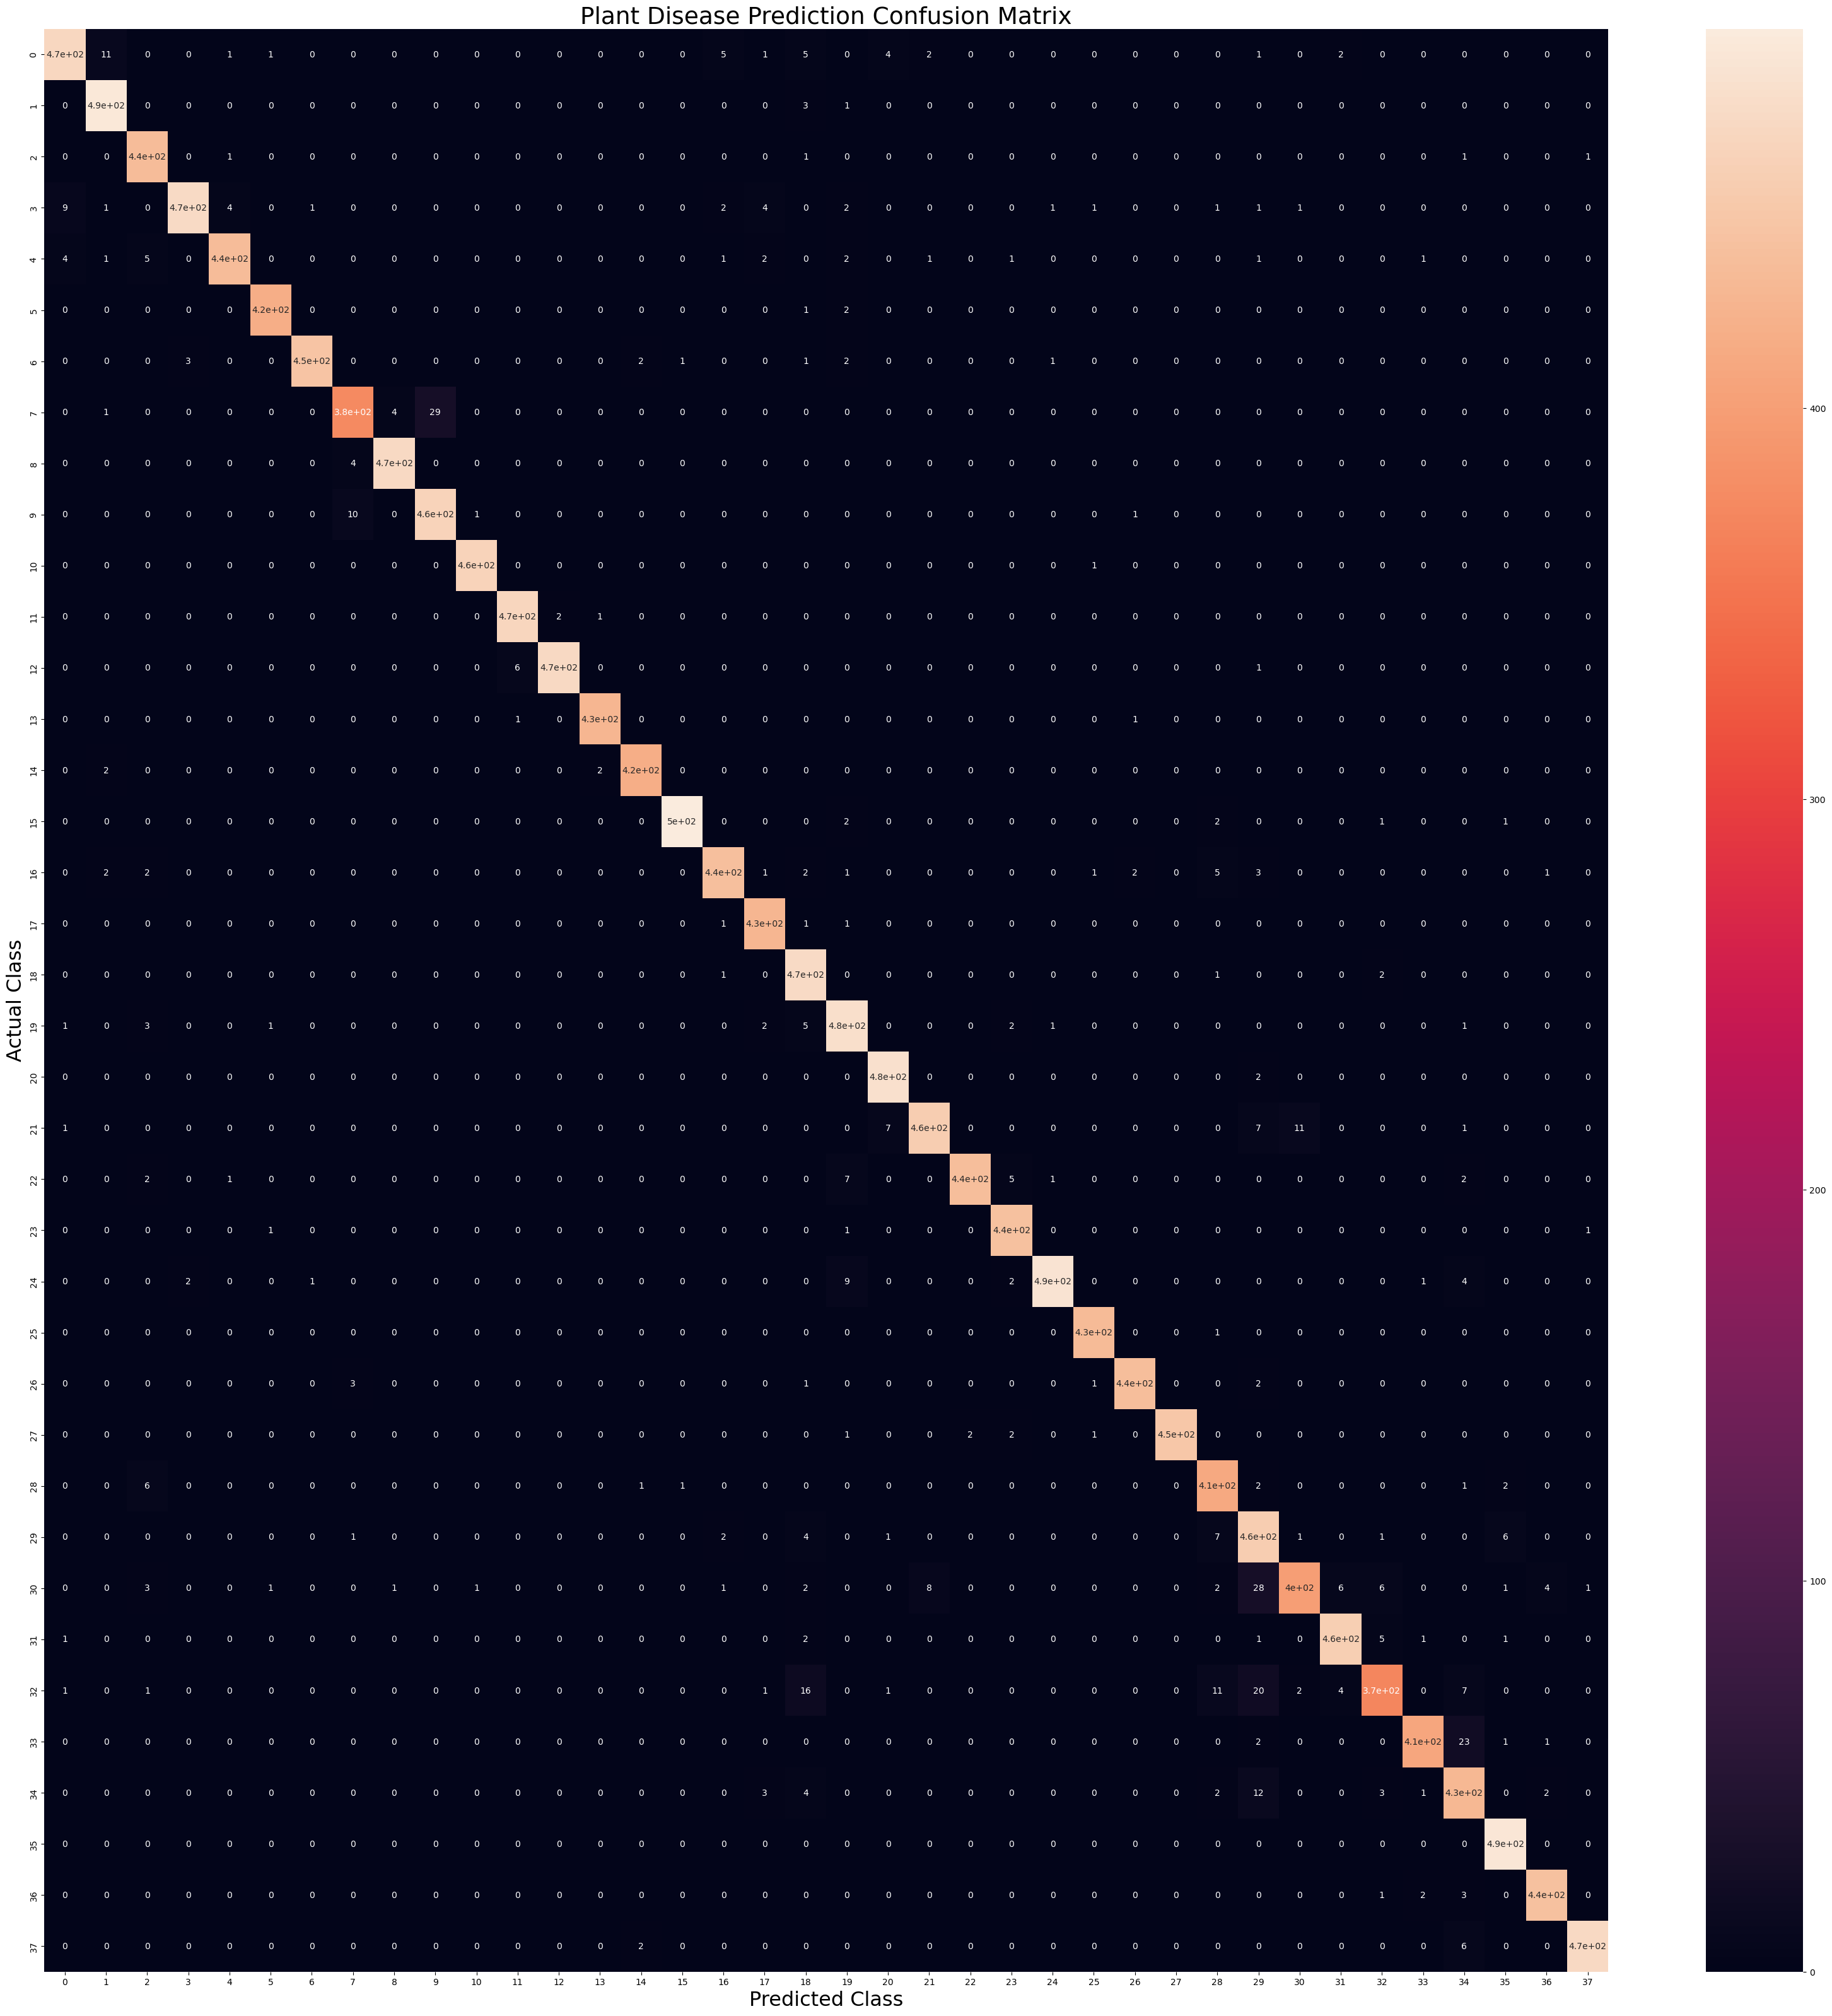

In [75]:
plt.figure(figsize=[40,40])
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=23)
plt.ylabel("Actual Class",fontsize=23)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=27)
plt.show()